# B2: Eye Color Classifier - SVM vs RF

# Import the required libraries

In [1]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
import time
import pandas as pd

In [3]:
import Tools as Tool
import warnings
warnings.filterwarnings("ignore")

# Feature Extraction and Data Split

In [4]:
# extract face shape features and labels from images by landmarks
startTime = time.clock()
X_train, X_val, X_test, y_train, y_val, y_test = Tool.data_preprocessingB2(test_size=0.3)

endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

Get the data from feature extraction for B2.
Split the data into training, validation and test set for B2.
The running time is 62.1733416 s


# Train the SVM Model and RF Model

In [32]:
# Build the SVM model with the optimized params found by GridSearchCV
def svmPredictCV(x_train, y_train, x_val):
    svmclf = svm.SVC()
    param_grid = [{'kernel': ['poly'], 'degree': [2,3], 'C': [1,10]}
                  ]
    grid_search = GridSearchCV(svmclf, param_grid, cv=3, scoring='accuracy')    
    grid_search.fit(x_train, y_train)
    
    # print dataframe  
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
    print(result) 
    best_accuracy_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print("Best: %f using %s" % (best_accuracy_score, best_params))
    
    # predict with the best classifier
    svmclf_cv = grid_search.best_estimator_
    y_pred = svmclf_cv.predict(x_val)
    
    return y_pred, svmclf_cv  

In [25]:
# Build Random Forest Model using Optimized n by GridSearchCV
def RanForCV(x_train, y_train, x_val):    
    rf = RandomForestClassifier(criterion='gini', max_features='log2', max_depth=10) #cv=3
    n_estimators = [10,30,50,100,200,300]
    param_grid = dict(n_estimators=n_estimators)
    grid_search = GridSearchCV(rf, param_grid)    
    grid_search.fit(x_train, y_train)    
    
    # print dataframe  
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
    print(result) 
    best_accuracy_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print("Best: %f using %s" % (best_accuracy_score, best_params))
    
    # predict with the best classifier
    rf_cv = grid_search.best_estimator_
    y_pred = rf_cv.predict(x_val)
    
    return y_pred, rf_cv  

In [33]:
# Train the SVM model to find optimal params
startTime = time.clock()

y_pred, svmclf_cv = svmPredictCV(X_train, y_train, X_val)
print(accuracy_score(y_val, y_pred))

endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')   # >200s

    C  degree kernel  Accuracy
0  10       2   poly  0.812144
1   1       3   poly  0.795429
2  10       3   poly  0.778144
Best: 0.812144 using {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.819
The running time is 884.6801625000007 s


[[499  21  10  39  44]
 [ 21 485  28  27  42]
 [ 15  10 496  25  55]
 [ 10  16  20 489  46]
 [ 14  20  24  32 512]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       613
           1       0.88      0.80      0.84       603
           2       0.86      0.83      0.84       601
           3       0.80      0.84      0.82       581
           4       0.73      0.85      0.79       602

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



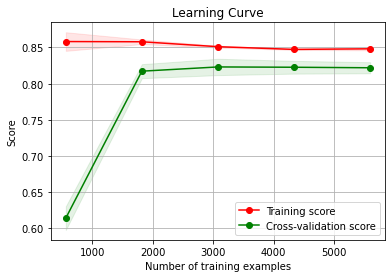

0.8525564226096483


In [31]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val,y_pred)) 

plt = Tool.plot_learning_curve(svmclf_cv, X_train, y_train)
plt.show()

   n_estimators  Accuracy
0            10  0.550143
1            30  0.677571
2            50  0.719714
3           100  0.764857
4           200  0.774714
5           300  0.776286
Best: 0.776286 using {'n_estimators': 300}
The running time is 58.72997739999846 s
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       613
           1       0.92      0.77      0.84       603
           2       0.90      0.64      0.75       601
           3       0.83      0.79      0.81       581
           4       0.60      0.94      0.73       602

    accuracy                           0.78      3000
   macro avg       0.81      0.78      0.78      3000
weighted avg       0.81      0.78      0.78      3000



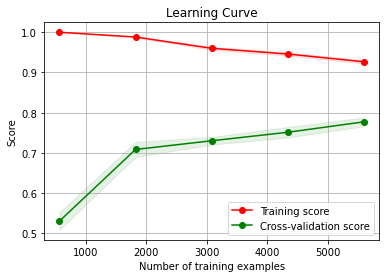

0.9641606425832233


In [26]:
# Train the RF model to find optimal params
startTime = time.clock()
y_pred, rf_cv = RanForCV(X_train, y_train, X_val)
endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

print(classification_report(y_val,y_pred)) 
plt = Tool.plot_learning_curve(rf_cv, X_train, y_train)
plt.show()

# Model_B2: Build SVM model with optimized params
## Build RF model with optimized params tuned manually

In [6]:
# Model_B2: Build the SVM model with the optimized params
def model_B2(x_train, x_val, x_test, y_train):
    B2_svm = svm.SVC(kernel='poly', C=1, degree=2)
    B2_svm.fit(x_train, y_train)
    y_pred_val = B2_svm.predict(x_val)
    y_pred_test = B2_svm.predict(x_test)
    
    return y_pred_val, y_pred_test, B2_svm

In [9]:
# Build Random Forest Model
def model_B2_rf(x_train, x_val, x_test, y_train):
    B2_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='log2', max_depth=10) 
    B2_rf.fit(X_train, y_train)
    y_pred_val = B2_rf.predict(x_val)
    y_pred_test = B2_rf.predict(x_test)
    
    return y_pred_val, y_pred_test, B2_rf

In [7]:
# Build and test the model_B2
y_pred_val, y_pred_test, B2_svm = model_B2(X_train, X_val, X_test, y_train)
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred_val)))
print('Accuracy on test set: ' + str(accuracy_score(y_test,y_pred_test)))
print('For validation set:')
print(classification_report(y_val,y_pred_val))
print('For test set:')
print(classification_report(y_test,y_pred_test))

Accuracy on validation set: 0.827
Accuracy on test set: 0.8264
For validation set:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       613
           1       0.88      0.80      0.84       603
           2       0.86      0.83      0.84       601
           3       0.80      0.84      0.82       581
           4       0.73      0.85      0.79       602

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

For test set:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       506
           1       0.87      0.80      0.84       483
           2       0.88      0.82      0.85       525
           3       0.80      0.83      0.82       514
           4       0.70      0.91      0.79       472

    accuracy                           0.83      2500
   macro avg       0.84      0.83 

The running time is 1.7582192999999506 s
              precision    recall  f1-score   support

           0       0.85      0.75      0.79       613
           1       0.91      0.74      0.82       603
           2       0.91      0.68      0.78       601
           3       0.82      0.80      0.81       581
           4       0.60      0.95      0.74       602

    accuracy                           0.78      3000
   macro avg       0.82      0.78      0.79      3000
weighted avg       0.82      0.78      0.79      3000



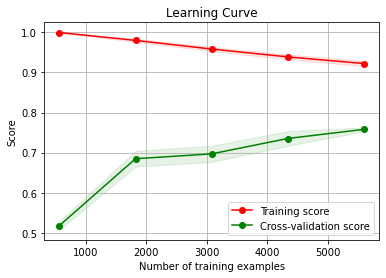

0.9598436112274822


In [14]:
# Test the RF model
startTime = time.clock()
y_pred_val, y_pred_test, B2_svm = model_B2(X_train, X_val, X_test, y_train)
endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

print(classification_report(y_val,y_pred)) 
plt = Tool.plot_learning_curve(rf_optimized, X_train, y_train)
plt.show()